<a href="https://colab.research.google.com/github/HennySweet/Henny/blob/main/datawarehouse_prosescoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Misalnya file berbentuk CSV
df = pd.read_csv("/content/penjualan barang.csv")

# Tampilkan 10 baris pertama untuk melihat struktur data
df.head()


,tanggal,nama.pembeli,nama.barang,kuantum,nominal
0,2020-01-02,TOKO HERUNIAWATI,BERAS,1000,9840000
1,2020-01-02,TOKO HERUNIAWATI,DAGING,120,8400000
2,2020-01-02,TOKO APRILIA SUKRISNI,BERAS,6000,62910000
3,2020-01-02,TOKO APRILIA SUKRISNI,MIGOR,408,4855200
4,2020-01-02,TOKO APRILIA SUKRISNI,TEPUNG,140,1162000


In [ ]:
# Ubah kolom tanggal ke format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Contoh: Menghapus tanda koma atau titik pada kolom numeric (jika diperlukan)
# Misalnya, kolom 'kuantum' atau 'nominal' berbentuk string dengan pemisah ribuan:
df['nominal'] = df['nominal'].astype(str).str.replace("[.,]", "", regex=True).astype(float)

# Cek duplikasi dan nilai kosong
print(df.isnull().sum())
df.drop_duplicates(inplace=True)


tanggal         0
nama.pembeli    0
nama.barang     0
kuantum         0
nominal         0
dtype: int64


In [ ]:
import sqlite3

# Buat koneksi ke database SQLite (file akan dibuat jika belum ada)
conn = sqlite3.connect('datawarehouse.db')

# Simpan dataframe ke tabel, misalnya 'fact_penjualan'
df.to_sql('fact_penjualan', conn, if_exists='replace', index=False)

# Contoh: Buat tabel dimensi waktu (jika ingin dibuat terpisah)
df['bulan'] = df['tanggal'].dt.month
df['tahun'] = df['tanggal'].dt.year
dim_waktu = df[['tanggal', 'bulan', 'tahun']].drop_duplicates()
dim_waktu.to_sql('dim_waktu', conn, if_exists='replace', index=False)


185

In [ ]:
query = """
SELECT tanggal, SUM(nominal) as total_penjualan
FROM fact_penjualan
GROUP BY tanggal
ORDER BY tanggal;
"""

result = pd.read_sql(query, conn)
result.head()


,tanggal,total_penjualan
0,2020-01-02 00:00:00,110976900.0
1,2020-01-03 00:00:00,16459900.0
2,2020-01-06 00:00:00,722308000.0
3,2020-01-07 00:00:00,22990500.0
4,2020-01-09 00:00:00,728534500.0


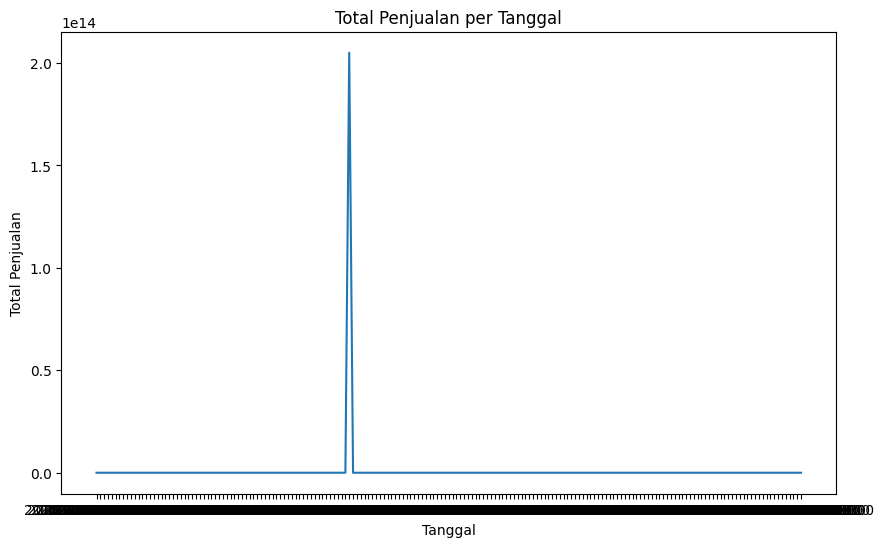

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=result, x='tanggal', y='total_penjualan')
plt.title("Total Penjualan per Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.show()


In [ ]:
query_bulan = """
SELECT tahun, bulan, SUM(nominal) as total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan
ORDER BY tahun, bulan;
"""
result_bulan = pd.read_sql(query_bulan, conn)
print(result_bulan)


DatabaseError: Execution failed on sql '
SELECT tahun, bulan, SUM(nominal) as total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan
ORDER BY tahun, bulan;
': no such column: tahun

In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['bulan'] = df['tanggal'].dt.month
df['tahun'] = df['tanggal'].dt.year

# Simpan dataframe yang sudah dilengkapi kolom tahun dan bulan ke tabel 'fact_penjualan'
df.to_sql('fact_penjualan', conn, if_exists='replace', index=False)


1140

In [ ]:
query = """
SELECT d.tahun, d.bulan, SUM(f.nominal) as total_penjualan
FROM fact_penjualan f
JOIN dim_waktu d ON f.tanggal = d.tanggal
GROUP BY d.tahun, d.bulan
ORDER BY d.tahun, d.bulan;
"""
result = pd.read_sql(query, conn)
result.head()


,tahun,bulan,total_penjualan
0,2020,1,4.767286e+10
1,2020,2,5.999610e+10
2,2020,3,1.555924e+10
3,2020,4,7.441446e+09
4,2020,5,2.050014e+14


from matplotlib import pyplot as plt
_df_0['bulan'].plot(kind='hist', bins=20, title='bulan')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_penjualan'].plot(kind='hist', bins=20, title='total_penjualan')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='bulan', y='total_penjualan', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tahun']
  ys = series['total_penjualan']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tahun')
_ = plt.ylabel('total_penjualan')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tahun']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tahun'}, axis=1)
              .sort_values('tahun', ascending=True))
  xs = counted['tahun']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tahun')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bulan']
  ys = series['total_penjualan']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('bulan', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bulan')
_ = plt.ylabel('total_penjualan')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['bulan']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'bulan'}, axis=1)
              .sort_values('bulan', ascending=True))
  xs = counted['bulan']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('bulan', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bulan')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['bulan'].plot(kind='line', figsize=(8, 4), title='bulan')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['total_penjualan'].plot(kind='line', figsize=(8, 4), title='total_penjualan')
plt.gca().spines[['top', 'right']].set_visible(False)

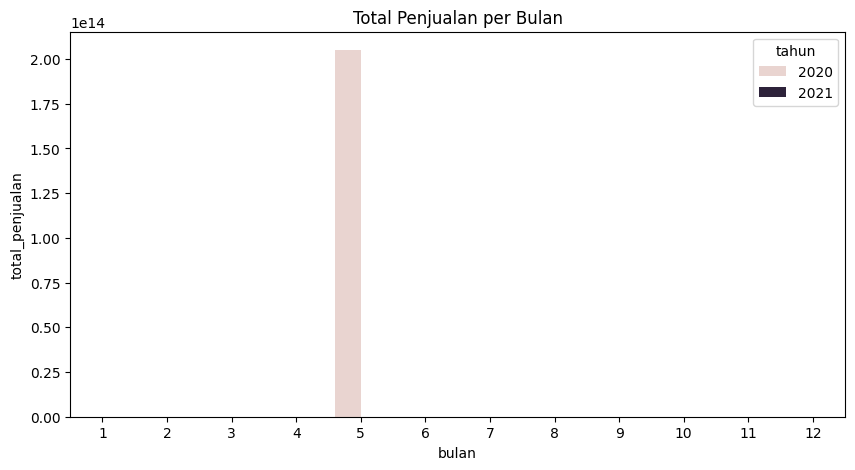

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='bulan', y='total_penjualan', hue='tahun', data=result)
plt.title("Total Penjualan per Bulan")
plt.show()


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
print(df['tahun'].unique())


[2020 2021]


In [ ]:
SELECT tahun, bulan, SUM(nominal) as total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan
ORDER BY tahun, bulan;


SyntaxError: invalid syntax (<ipython-input-16-323b5af4bdd4>, line 1)

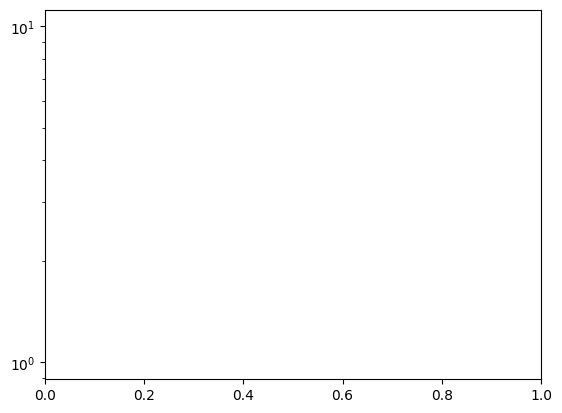

In [ ]:
plt.yscale('log')


In [ ]:
print(df['tahun'].unique())


[2020 2021]


In [ ]:
query_cek = "SELECT DISTINCT(tahun) FROM fact_penjualan"
hasil_cek = pd.read_sql(query_cek, conn)
print(hasil_cek)


   tahun
0   2020
1   2021


In [ ]:
query_bulan = """
SELECT tahun, bulan, SUM(nominal) as total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan
ORDER BY tahun, bulan;
"""
result_bulan = pd.read_sql(query_bulan, conn)
print(result_bulan)

    tahun  bulan  total_penjualan
0    2020      1     4.767286e+10
1    2020      2     5.999610e+10
2    2020      3     1.555924e+10
3    2020      4     7.441446e+09
4    2020      5     2.050014e+14
5    2020      6     7.755301e+10
6    2020      7     7.911156e+09
7    2020      8     1.523319e+09
8    2020      9     1.061298e+09
9    2020     10     8.595817e+08
10   2020     11     2.071575e+09
11   2020     12     1.870546e+09
12   2021      1     2.825374e+08
13   2021      2     7.412910e+08
14   2021      3     1.254120e+08
15   2021      4     5.045749e+08


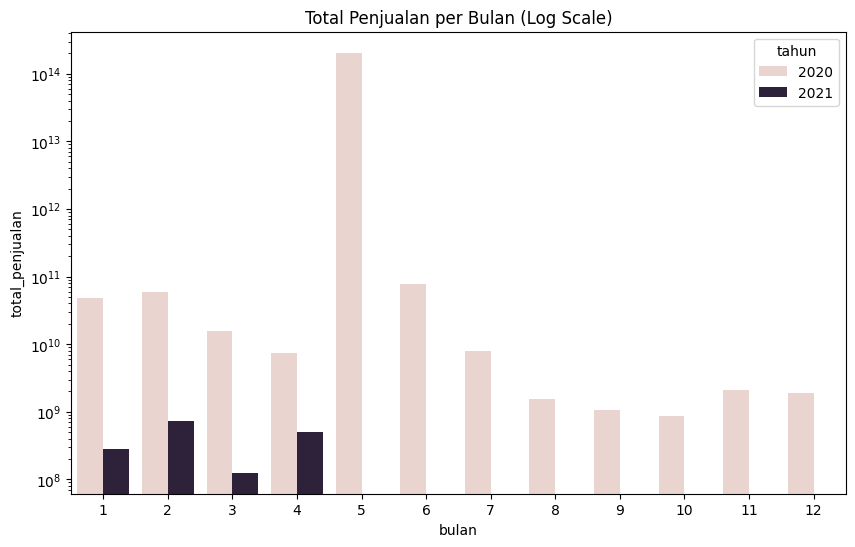

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='bulan', y='total_penjualan', hue='tahun', data=result_bulan)
plt.yscale('log')  # Ubah skala sumbu Y ke logaritmik
plt.title("Total Penjualan per Bulan (Log Scale)")
plt.show()


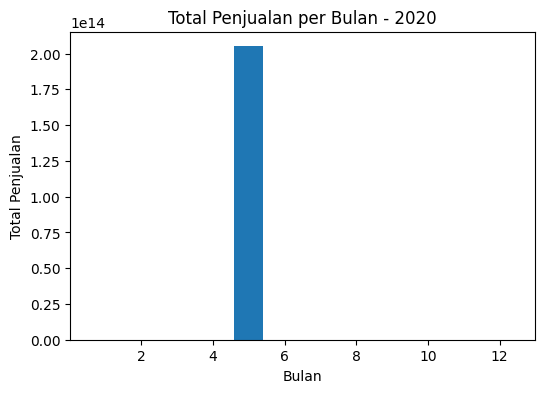

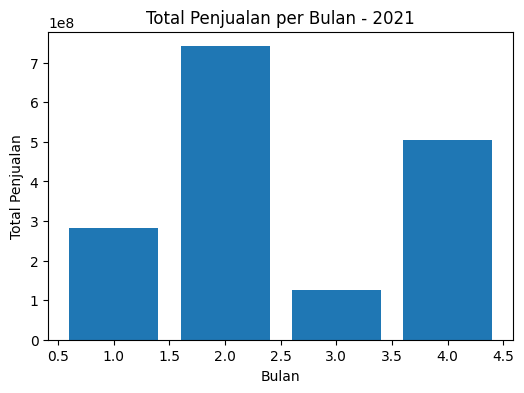

In [ ]:
import matplotlib.pyplot as plt

for thn in result_bulan['tahun'].unique():
    data_tahun = result_bulan[result_bulan['tahun'] == thn]
    plt.figure(figsize=(6,4))
    plt.bar(data_tahun['bulan'], data_tahun['total_penjualan'])
    plt.title(f"Total Penjualan per Bulan - {thn}")
    plt.xlabel("Bulan")
    plt.ylabel("Total Penjualan")
    plt.show()


In [ ]:
max_val = result_bulan['total_penjualan'].max()
print("Nilai max:", max_val)


Nilai max: 205001350379400.0


In [ ]:
baris_max = result_bulan.loc[result_bulan['total_penjualan'] == max_val]
print(baris_max)


   tahun  bulan  total_penjualan  penjualan_miliar
4   2020      5     2.050014e+14     205001.350379


In [32]:
query = """
SELECT tahun, bulan, "nama.barang", SUM(nominal) AS total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan, "nama.barang"
ORDER BY tahun, bulan;
"""
result = pd.read_sql(query, conn)
print(result.head())


   tahun  bulan nama.barang  total_penjualan
0   2020      1       BERAS     4.252803e+10
1   2020      1      DAGING     5.132400e+09
2   2020      1       MIGOR     8.282400e+06
3   2020      1      TEPUNG     4.150000e+06
4   2020      2       BERAS     5.923178e+10


In [35]:
# Query untuk agregasi penjualan per produk per tahun
query_produk = """
SELECT tahun, "nama.barang" AS nama_barang, SUM(nominal) AS total_penjualan
FROM fact_penjualan
GROUP BY tahun, "nama.barang"
ORDER BY total_penjualan DESC;
"""
result_produk = pd.read_sql(query_produk, conn)
print(result_produk.head())


   tahun nama_barang  total_penjualan
0   2020       BERAS     2.051362e+14
1   2020        GULA     7.431011e+10
2   2020      DAGING     1.375241e+10
3   2021       BERAS     1.218858e+09
4   2020      TEPUNG     4.471564e+08


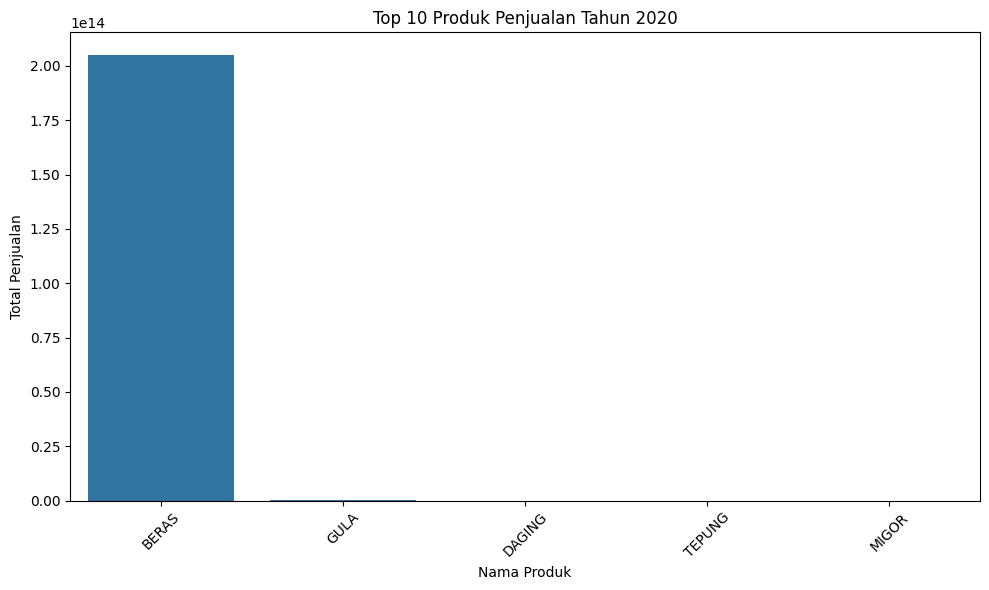

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk tahun 2020 dan ambil 10 produk teratas berdasarkan penjualan
top_produk = result_produk[result_produk['tahun'] == 2020].head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_produk, x="nama_barang", y="total_penjualan")
plt.xticks(rotation=45)
plt.title("Top 10 Produk Penjualan Tahun 2020")
plt.xlabel("Nama Produk")
plt.ylabel("Total Penjualan")
plt.tight_layout()
plt.show()


In [38]:
from google.colab import files
files.download('datawarehouse.db')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
def execute_query(query):
    try:
        result = pd.read_sql(query, conn)
        return result
    except Exception as e:
        print("Error executing query:", e)
        return None

# Contoh penggunaan fungsi query manager:
query_example = """
SELECT tahun, bulan, "nama.barang" AS nama_barang, SUM(nominal) AS total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan, "nama.barang"
ORDER BY tahun, bulan;
"""
result_query = execute_query(query_example)
print(result_query.head())


   tahun  bulan nama_barang  total_penjualan
0   2020      1       BERAS     4.252803e+10
1   2020      1      DAGING     5.132400e+09
2   2020      1       MIGOR     8.282400e+06
3   2020      1      TEPUNG     4.150000e+06
4   2020      2       BERAS     5.923178e+10


In [40]:
user_query = input("Masukkan query SQL: ")
result_user = execute_query(user_query)
if result_user is not None:
    print(result_user)


Masukkan query SQL: SELECT * FROM fact_penjualan LIMIT 10;
               tanggal           nama.pembeli nama.barang kuantum     nominal  \
0  2020-01-02 00:00:00       TOKO HERUNIAWATI       BERAS    1000   9840000.0   
1  2020-01-02 00:00:00       TOKO HERUNIAWATI      DAGING     120   8400000.0   
2  2020-01-02 00:00:00  TOKO APRILIA SUKRISNI       BERAS    6000  62910000.0   
3  2020-01-02 00:00:00  TOKO APRILIA SUKRISNI       MIGOR     408   4855200.0   
4  2020-01-02 00:00:00  TOKO APRILIA SUKRISNI      TEPUNG     140   1162000.0   
5  2020-01-02 00:00:00        TOKO MAJU TERUS       BERAS     820   8597700.0   
6  2020-01-02 00:00:00        TOKO MAJU TERUS       BERAS     550   5412000.0   
7  2020-01-02 00:00:00        TOKO MAJU TERUS      DAGING     140   9800000.0   
8  2020-01-03 00:00:00    KOPERASI BRI MELAWI       BERAS    1180  12372300.0   
9  2020-01-03 00:00:00    KOPERASI BRI MELAWI       MIGOR     204   2427600.0   

   bulan  tahun  
0      1   2020  
1      1   20

In [41]:
user_query = input("Masukkan query SQL: ")
result_user = execute_query(user_query)
if result_user is not None:
    print(result_user)



Masukkan query SQL: SELECT * FROM fact_penjualan LIMIT 5;
               tanggal           nama.pembeli nama.barang kuantum     nominal  \
0  2020-01-02 00:00:00       TOKO HERUNIAWATI       BERAS    1000   9840000.0   
1  2020-01-02 00:00:00       TOKO HERUNIAWATI      DAGING     120   8400000.0   
2  2020-01-02 00:00:00  TOKO APRILIA SUKRISNI       BERAS    6000  62910000.0   
3  2020-01-02 00:00:00  TOKO APRILIA SUKRISNI       MIGOR     408   4855200.0   
4  2020-01-02 00:00:00  TOKO APRILIA SUKRISNI      TEPUNG     140   1162000.0   

   bulan  tahun  
0      1   2020  
1      1   2020  
2      1   2020  
3      1   2020  
4      1   2020  


In [44]:
query = """
SELECT tahun, bulan, "nama.barang" AS nama_barang, SUM(nominal) AS total_penjualan
FROM fact_penjualan
GROUP BY tahun, bulan, "nama.barang"
ORDER BY tahun, bulan;
"""
result = pd.read_sql(query, conn)
print(result.head())


   tahun  bulan nama_barang  total_penjualan
0   2020      1       BERAS     4.252803e+10
1   2020      1      DAGING     5.132400e+09
2   2020      1       MIGOR     8.282400e+06
3   2020      1      TEPUNG     4.150000e+06
4   2020      2       BERAS     5.923178e+10


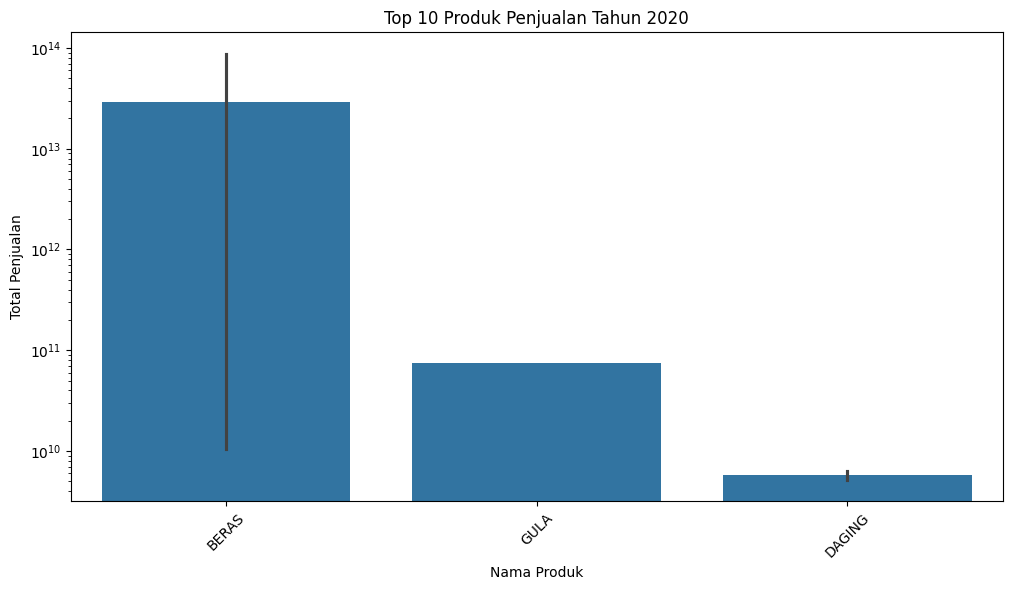

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk tahun 2020 dan ambil 10 produk teratas berdasarkan total penjualan
top_produk = result[result['tahun'] == 2020].sort_values('total_penjualan', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_produk, x="nama_barang", y="total_penjualan")
plt.xticks(rotation=45)
plt.title("Top 10 Produk Penjualan Tahun 2020")
plt.xlabel("Nama Produk")
plt.ylabel("Total Penjualan")
plt.tight_layout()
plt.yscale('log')
plt.show()


In [49]:
from google.colab import files
files.download('datawarehouse.db')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>